In [1]:
from pysrc.optimization.gurobi import solve_planner_problem
from pysrc.services.data_service import load_site_data

import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_sites = 10
T = 200

In [3]:
(
    zbar_2017,
    gamma,
    z_2017,
    forestArea_2017_ha,
    theta,
    _,
    _,
    _,
    _,
) = load_site_data(num_sites)

# Computing carbon absorbed in start period
x0_vals = gamma * forestArea_2017_ha

(Z, X, U, V, w) = solve_planner_problem(
    T=T,
    theta=theta,
    gamma=gamma,
    x0_vals=x0_vals,
    zbar_2017=zbar_2017,
    z_2017=z_2017,
)

Data successfully loaded from '/Users/patriciohernandez/Projects/project-amazon/data/hmc/hmc_10SitesModel.csv'
Solving the optimization problem...
Set parameter Username
Academic license - for non-commercial use only - expires 2024-10-25
Read LP format model from file /var/folders/6c/nk2mr74n38zd6bdzqw3bcrw00000gs/T/tmp8xt0b_n6.pyomo.lp
Reading time = 0.02 seconds
x1: 4200 rows, 8201 columns, 20170 nonzeros
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-9600K CPU @ 3.70GHz
Thread count: 6 physical cores, 6 logical processors, using up to 6 threads

Optimize a model with 4200 rows, 8201 columns and 20170 nonzeros
Model fingerprint: 0x07ac5f4e
Model has 200 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 8e+02]
  Objective range  [8e-03, 4e+03]
  QObjective range [3e+03, 2e+05]
  Bounds range     [1e-02, 1e+00]
  RHS range        [4e-05, 4e+01]
Presolve removed 2000 rows and 2001 columns
Presolve time: 0.01s
Pre

In [4]:
X_agg = X.sum(axis=1)
X_agg = X_agg.reshape(X_agg.size,1)

sol_val_Ua = (w**2).T.flatten()
sol_val_X = np.concatenate((Z.T, X_agg.T, np.ones((1, Z.T.shape[1]))))
sol_val_Up = U.T
sol_val_Um = V.T
sol_val_Z = sol_val_Up - sol_val_Um

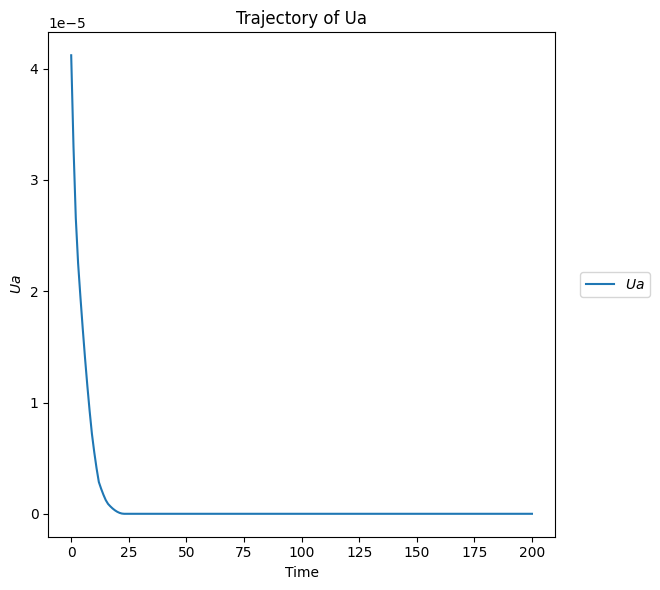

In [5]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
plt.plot(sol_val_Ua, label=r"$Ua$")

plt.xlabel("Time")
plt.ylabel(r"$Ua$")
plt.title(r"Trajectory of Ua")
legend = plt.legend(bbox_to_anchor=(1.05, 0.5), loc="center left", borderaxespad=0)
fig.tight_layout()
plt.subplots_adjust(right=0.7)

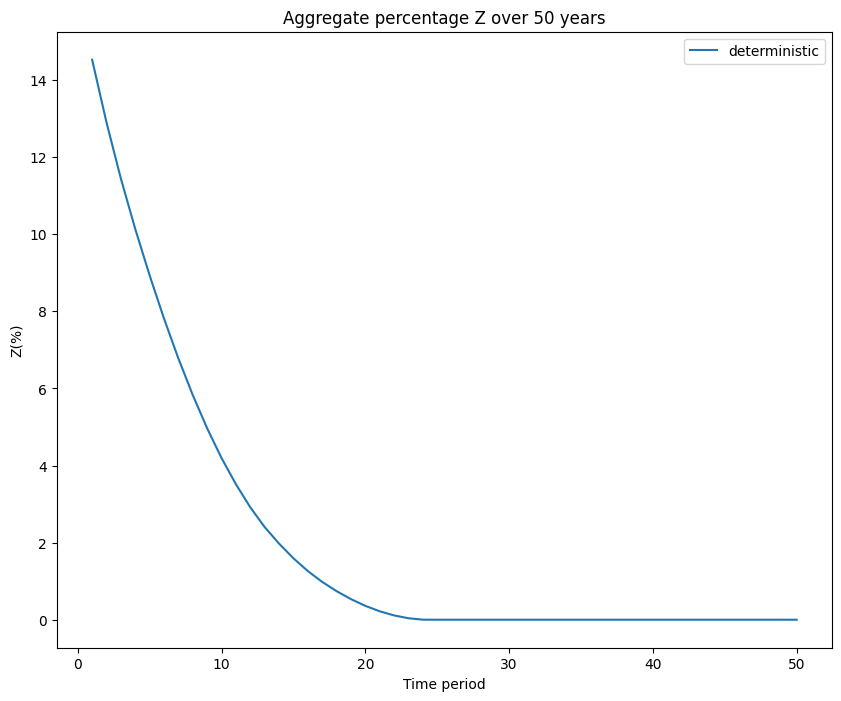

In [6]:
# Load deterministic z solved
z_det = sol_val_Z[:, :50]
# Sum zdot and add it to the z_2017
z_2017 = z_2017.reshape(num_sites, 1)
cumulative_det_z = np.cumsum(z_det, axis=1) + z_2017
cumulative_det_z = np.hstack((z_2017, cumulative_det_z))

pct_z_det = np.sum(cumulative_det_z, axis=0) / (np.sum(zbar_2017)) * 100
time = np.arange(1, 51)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

plt.plot(time, pct_z_det[:50], label="deterministic")

plt.xlabel("Time period")
plt.ylabel("Z(%)")
plt.title("Aggregate percentage Z over 50 years")

# Display the legend
plt.legend()